In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor


In [2]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [3]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [4]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [5]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [6]:
import os


# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")

In [7]:
# with open('all_local_ips','r') as firstfile, open('all_external_ips','w') as secondfile:
      
#     # read content from first file
#     for line in firstfile:

#         secondfile.write(line)
        
        
# with open('all_local_ips','r') as firstfile, open('all_internal_ips','w') as secondfile:
      
#     # read content from first file
#     for line in firstfile:

#         secondfile.write(line)

In [8]:
import subprocess

In [9]:
nclients = 2
nnodes = 20

In [10]:
# f = open('all_external_ips', "r")
# data1 = [line.strip() for line in f.readlines()]

In [11]:
# f = open('all_internal_ips', "r")
# data2 = [line.strip() for line in f.readlines()]

In [12]:
# data2, len(data2)

(['127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1'],
 22)

In [13]:
# data = []

In [14]:
# # for i in range(len(data1)):
# #     if data1[i]!='None':
# # #         data.append(data1[i] + '    ' + data2[i])
# #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

# skip_instances = 0
    
# for i in range(skip_instances, len(data1)):
#     if data1[i]!='None':
#         data.append(data1[i] + '    ' + data2[i])
# #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [15]:
# data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 22)

In [16]:
# with open('replicas.txt', 'w') as f:
#     for line in data[:nnodes]:
#         f.write("%s\n" % line)

In [10]:
# data, len(data)

In [16]:
# nclients

In [17]:
# with open('clients.txt', 'w') as f:
#     for line in data[nnodes:]:
# #     for i in range(nclients):

# #         f.write("%s\n" % line.split(' ')[0])
#         f.write("127.0.0.1\n")        

In [18]:
# os.system('cat clients.txt')

In [19]:
import numpy as np

In [20]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [21]:


# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

# os.system("aws --region us-west-1 ec2 describe-instances  --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")


with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines[:]:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "Fina

In [22]:
len(lines)

22

In [23]:
# lines = lines[1:]

In [24]:
len(lines)

22

In [25]:
# results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
# print(results)  

In [26]:
lines, len(lines)

(['127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1',
  '127.0.0.1'],
 22)

In [27]:
import shutil

In [28]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [29]:
# # # os.system('echo 3108 | sudo -S ls')

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        

        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 5 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [30]:
# def setup_remote(i):

#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
# #         print(command)
        
#         output = subprocess.getoutput(command)
#         print(output)
        
        
# def setup_remote2(i):

#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T " cd hs; git pull;"'
# #         print(command)
        
#         output = subprocess.getoutput(command)
#         print(output)
        
        
# def git_pull_remote(i):

#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo git pull;"'

        
#         output = subprocess.getoutput(command)
#         print(output)


        
        
# def run_join_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip == nodeIps[-1]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_join_node1_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip == nodeIps[-1]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
# def run_join_node2_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip == nodeIps[-2]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
# def run_join_node3_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip == nodeIps[-3]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(clientIps.index(ip))+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)
#         output = subprocess.getoutput(command)

        
        

# def kill_nodes_remote(i):
#     ip = lines[i]
    
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
#         output = subprocess.getoutput(command)
#         print(output)

        

# def clean_nodes_remote(i):
#     ip = lines[i]
    
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        
#         output = subprocess.getoutput(command)
        
# def compile_remote(i):

#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo cmake -DCMAKE_BUILD_TYPE=Release -DBUILD_SHARED=ON -DHOTSTUFF_PROTO_LOG=ON; sudo make -j4"'


#         output = subprocess.getoutput(command)
#         print(output)

In [31]:
experiment = 'temp'

In [32]:
# os.system('rm hotstuff.gen*')
# os.system('sh job_mini.sh '+ experiment)

# os.system('cp hotstuff.gen* ../../')

In [33]:
node_list = list(range(len(lines)))
node_list

node_list_server = node_list[:nnodes]
node_list_client = node_list[-nclients:]

node_list_server, node_list_client


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21])

In [34]:
node_list[-1:]

[21]

In [35]:
nnodes

20

In [36]:
os.system('echo 3108 | sudo -S rm ../'+experiment+'/nohup_*')


os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall hotstuff-client')
os.system('echo 3108 | sudo -S killall nohup')
# os.system('cd ../../; echo 3108 | sudo make clean')

[sudo] password for tejas: rm: cannot remove '../temp/nohup_*': No such file or directory
[sudo] password for tejas: hotstuff-app: no process found
[sudo] password for tejas: hotstuff-client: no process found
[sudo] password for tejas: nohup: no process found


256

In [38]:
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




Name of TestRun: temp
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hs
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 45%] Built target hotstuff
[ 62%] Built target salticidae
[ 64%] Built target salticidae_shared
[ 67%] Built target salticidae_static
[ 70%] Built target hotstuff_shared
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependen

0

In [39]:
        
def run_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps[:-3]):
    if ip!='None' and ip in lines[:nnodes]:

        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > temp/nohup_'+str(i)+'.out 2>&1 &'

        print(command)
        os.system(command)
        
        





results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

print(results)


time.sleep(10)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [40]:
        
        
# def run_node_check(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
# for i in range(8):
#     run_node_check(i)
        
# def run_client_check(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 5 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)

# for i in [8,9]:
#     run_client_check(i)    

In [41]:
time.sleep(10)

In [42]:
def run_client(i):
    ip = lines[i]
    client_no = i - nnodes
    if ip!='None' and( ip in lines[nnodes:]):
        
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 400 > temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
        print(command)
        os.system(command)



results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [20,21])

time.sleep(70)

In [43]:

# # os.system('echo 3108 | sudo -S killall hotstuff-client')


# join_node_cluster = 1

     
# def run_join_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-app --join_node '+str(join_node_cluster)+' --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        



# results = Parallel(n_jobs=len(lines))(delayed(run_join_node)(i) for i in [8])

# print(results)


In [44]:

results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [17])

print(results)


time.sleep(20)

[None]


In [45]:

results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [18])

print(results)


time.sleep(20)

[None]


In [46]:

results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [19])

print(results)


time.sleep(20)

[None]


In [47]:

# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 400 > ../temp/nohup_client_'+str(i)+'_n.out 2>&1 &'
        
#         print(command)
#         os.system(command)





# time.sleep(1)
# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [9,10])


In [48]:
time.sleep(30)

In [49]:
# os.system('echo 1234 | sudo -S killall hotstuff-client')

In [50]:
# def print_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
# print_node(8)

In [51]:
# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [8])
# print(results)


# time.sleep(10)

In [52]:
# time.sleep(30)

In [53]:
# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [9,10])

# time.sleep(30)

In [54]:
# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [7])


# time.sleep(15)

# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [8])


# time.sleep(15)

# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [9])

# time.sleep(45)

# os.system('echo 1234 | sudo -S killall hotstuff-client')

# time.sleep(15)

# results = Parallel(n_jobs=len(lines))(delayed(run_client2)(i) for i in [8,9])
# time.sleep(65)

In [55]:
# time.sleep(25)

In [56]:
os.system('echo 3108 | sudo -S killall hotstuff-client')


os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall nohup')

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: nohup: no process found


256

In [57]:
experiment = 'temp'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

1508.4658385093169 0.44171484732132926


In [58]:
lats

[0.200847,
 0.200947,
 0.200983,
 0.201022,
 0.201062,
 0.201101,
 0.201293,
 0.201311,
 0.201344,
 0.201377,
 0.201402,
 0.201298,
 0.2012,
 0.200943,
 0.198718,
 0.198755,
 0.198759,
 0.198777,
 0.198825,
 0.198877,
 0.198922,
 0.198963,
 0.19901,
 0.199058,
 0.199091,
 0.199123,
 0.199163,
 0.199209,
 0.199258,
 0.199302,
 0.199343,
 0.199377,
 0.19942,
 0.199461,
 0.199504,
 0.199553,
 0.199584,
 0.199623,
 0.198448,
 0.198547,
 0.198597,
 0.198634,
 0.198669,
 0.198711,
 0.198773,
 0.198809,
 0.198847,
 0.198885,
 0.198924,
 0.198961,
 0.198988,
 0.199034,
 0.199067,
 0.199103,
 0.199128,
 0.199161,
 0.199198,
 0.199238,
 0.199282,
 0.199317,
 0.199329,
 0.199358,
 0.199402,
 0.199456,
 0.199498,
 0.199545,
 0.199587,
 0.199636,
 0.199677,
 0.199723,
 0.199769,
 0.199816,
 0.199855,
 0.199897,
 0.199941,
 0.19999,
 0.200032,
 0.20007,
 0.200112,
 0.200158,
 0.200202,
 0.200246,
 0.200288,
 0.200329,
 0.200372,
 0.200419,
 0.200472,
 0.200521,
 0.200567,
 0.200615,
 0.200661,
 0.20

In [59]:
# np.sum(Y)111178.0


In [60]:
np.sum(Y)

242863.0

In [61]:
# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(X[:-1],Y[:-1], '-*')
# # pl.plot(X[:-1],np.cumsum(Y[:-1])*np.average(Y[:-1])/np.sum(Y[:-1]), '-*')

# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# # pl.ylim(0,1000)
# # pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# # pl.plot(X[:-1],Y[:-1], '-*')
# pl.plot(X[:-1],np.cumsum(Y[:-1]), '-*')

# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# # pl.ylim(0,1000)
# # pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

In [62]:
SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 

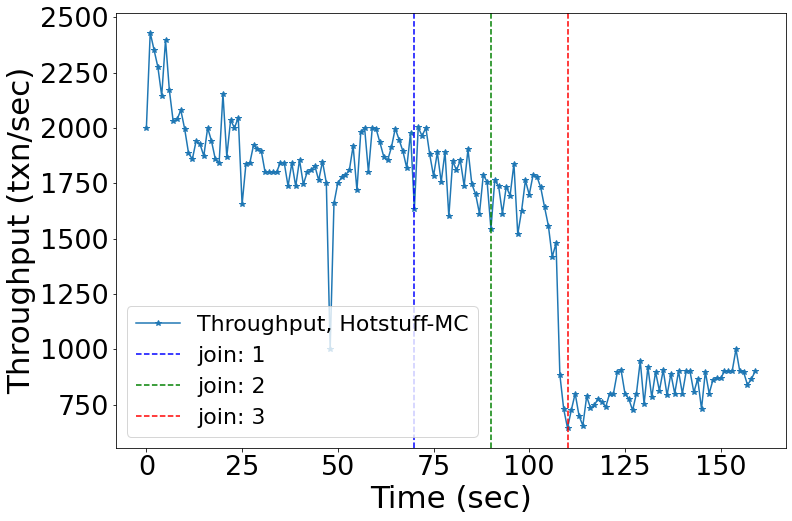

<Figure size 432x288 with 0 Axes>

In [63]:

from itertools import cycle
cycol = cycle('bgrcmk')



fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-1],Y[:-1], '-*', label = 'Throughput, Hotstuff-MC')
# pl.plot(X[:-1],np.cumsum(Y[:-1])*np.average(Y[:-1])/np.sum(Y[:-1]), '-*')

pl.xlabel('Time (sec)')
pl.ylabel('Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')


pl.axvline(x = 70, color = next(cycol), linestyle='--', label = 'join: 1')
pl.axvline(x = 90, color = next(cycol), linestyle='--', label = 'join: 2')
pl.axvline(x = 110, color = next(cycol), linestyle='--', label = 'join: 3')
pl.legend()
# pl.ylim(0,1000)
pl.savefig('join.pdf', dpi =150, bbox_inches = 'tight' )
pl.show()
pl.clf()
